In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset (replace with your path or URL)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Check class distribution
print("Original class distribution:", np.bincount(y))

Original class distribution: [500 268]


In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# 1. Scale original train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train model on original data
model_original = LogisticRegression(random_state=42)
model_original.fit(X_train_scaled, y_train)
y_pred_original = model_original.predict(X_test_scaled)
print("Performance on Original Data:")
print(classification_report(y_test, y_pred_original))

# 3. Apply SMOTE on unscaled original data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Scale the resampled training set
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# 5. Train model on SMOTE data
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_train_resampled_scaled, y_train_resampled)
y_pred_smote = model_smote.predict(X_test_scaled)
print("Performance on SMOTE Data:")
print(classification_report(y_test, y_pred_smote))


Performance on Original Data:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Performance on SMOTE Data:
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        99
           1       0.55      0.76      0.64        55

    accuracy                           0.69       154
   macro avg       0.69      0.71      0.68       154
weighted avg       0.73      0.69      0.69       154



In [6]:
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = []
y_true_cv = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Fit pipeline
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    y_pred_cv.extend(y_pred)
    y_true_cv.extend(y_test)

# Evaluate
print("Cross-Validation Performance with SMOTE:")
print(classification_report(y_true_cv, y_pred_cv))

Cross-Validation Performance with SMOTE:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       500
           1       0.63      0.72      0.67       268

    accuracy                           0.75       768
   macro avg       0.73      0.74      0.73       768
weighted avg       0.76      0.75      0.75       768



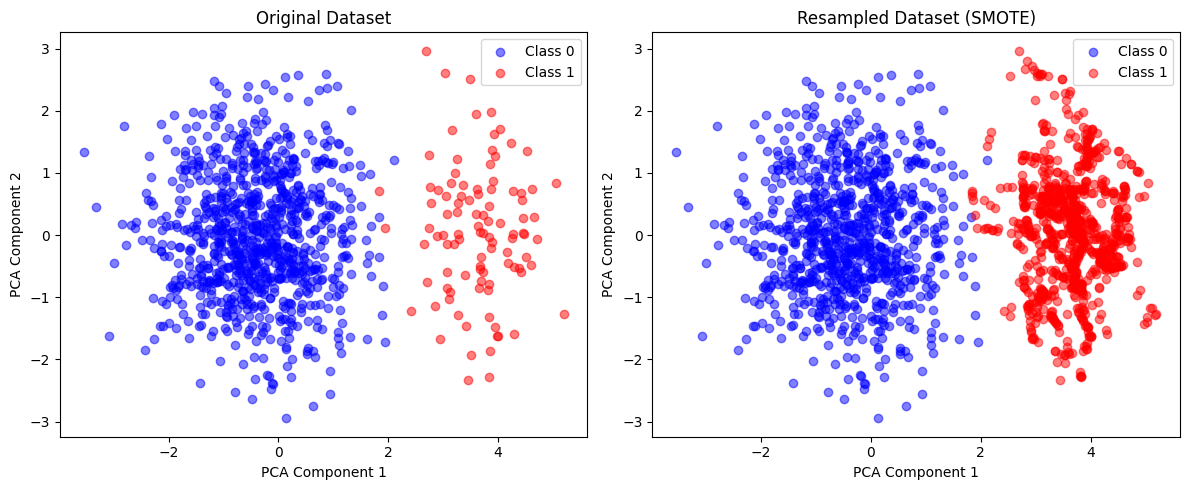

In [7]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1], n_informative=3,
                           n_redundant=1, flip_y=0, n_features=5, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_resampled_pca = pca.transform(X_resampled)

# Plot original and resampled data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label="Class 0", alpha=0.5, c="blue")
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label="Class 1", alpha=0.5, c="red")
plt.title("Original Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_resampled_pca[y_resampled == 0, 0], X_resampled_pca[y_resampled == 0, 1], label="Class 0", alpha=0.5, c="blue")
plt.scatter(X_resampled_pca[y_resampled == 1, 0], X_resampled_pca[y_resampled == 1, 1], label="Class 1", alpha=0.5, c="red")
plt.title("Resampled Dataset (SMOTE)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

plt.tight_layout()
plt.show()

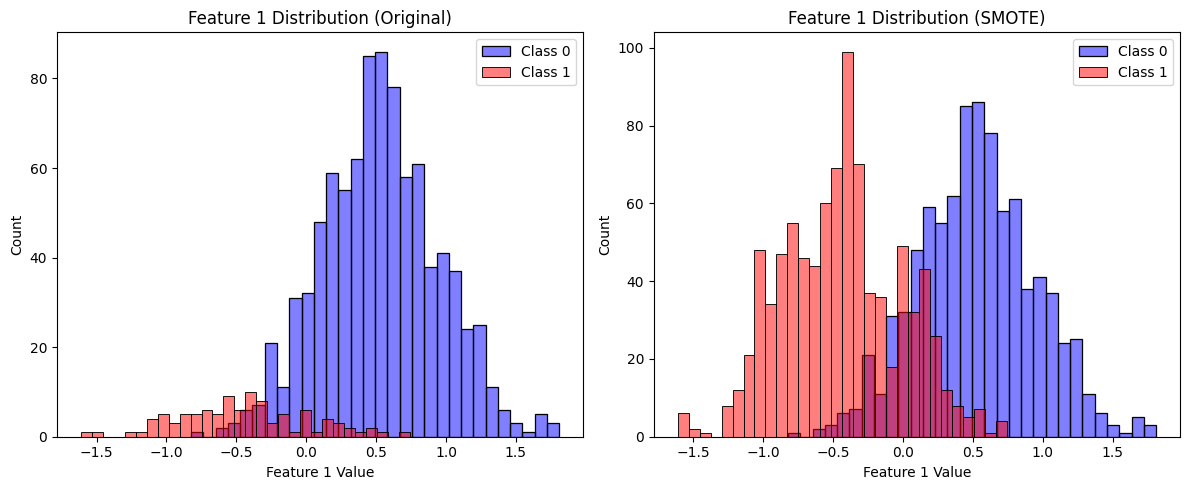

In [8]:
import seaborn as sns

# Plot histogram of the first feature
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(X[y == 0, 0], label="Class 0", color="blue", alpha=0.5, bins=30)
sns.histplot(X[y == 1, 0], label="Class 1", color="red", alpha=0.5, bins=30)
plt.title("Feature 1 Distribution (Original)")
plt.xlabel("Feature 1 Value")
plt.ylabel("Count")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(X_resampled[y_resampled == 0, 0], label="Class 0", color="blue", alpha=0.5, bins=30)
sns.histplot(X_resampled[y_resampled == 1, 0], label="Class 1", color="red", alpha=0.5, bins=30)
plt.title("Feature 1 Distribution (SMOTE)")
plt.xlabel("Feature 1 Value")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Class counts
original_counts = np.bincount(y_train)
resampled_counts = np.bincount(y_train_resampled)
print("Original counts:", original_counts)
print("Resampled counts:", resampled_counts)

Original counts: [401 213]
Resampled counts: [401 401]


/tmp/ipython-input-3963141784.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(X_train[y_train_resampled == 0]['Glucose'], label="Non-Diabetic", color="blue", alpha=0.5, bins=30)
/tmp/ipython-input-3963141784.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(X_train[y_train_resampled == 1]['Glucose'], label="Diabetic", color="red", alpha=0.5, bins=30)


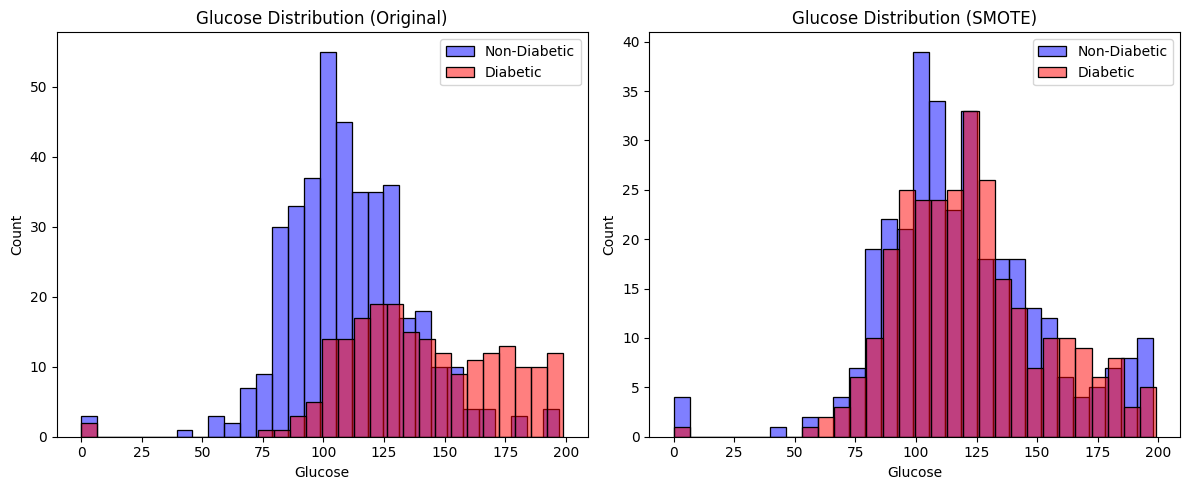

In [10]:
# Plot histogram of Glucose feature
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(X_train[y_train == 0]['Glucose'], label="Non-Diabetic", color="blue", alpha=0.5, bins=30)
sns.histplot(X_train[y_train == 1]['Glucose'], label="Diabetic", color="red", alpha=0.5, bins=30)
plt.title("Glucose Distribution (Original)")
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(X_train[y_train_resampled == 0]['Glucose'], label="Non-Diabetic", color="blue", alpha=0.5, bins=30)
sns.histplot(X_train[y_train_resampled == 1]['Glucose'], label="Diabetic", color="red", alpha=0.5, bins=30)
plt.title("Glucose Distribution (SMOTE)")
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()